Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

Mount Google Drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Path to your dataset in Drive
filePath = "/content/drive/MyDrive/Crop_recommendation.csv"


Mounted at /content/drive


Dataset Overview

In [3]:
# Load Dataset
cropData = pd.read_csv(filePath)

# Shape of the dataset (rows, columns)
print("Dataset Shape:", cropData.shape)

# Display first 5 rows of the dataset
print("\nSample Records:")
print(cropData.head())

# Column names
print("\nColumns:")
print(cropData.columns.tolist())

Dataset Shape: (2200, 8)

Sample Records:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Columns:
['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


Dataset Quality Check

In [4]:
# Check missing values in the Dataset
print("\nMissing Values per Column:\n")
print(cropData.isnull().sum())

# Check duplicate rows
duplicateCount = cropData.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicateCount}")



Missing Values per Column:

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Number of Duplicate Rows: 0


In [5]:
# Numerical feature statistics
print("\nStatistical Summary:")
print(cropData.describe().T)


Statistical Summary:
              count        mean        std        min        25%        50%  \
N            2200.0   50.551818  36.917334   0.000000  21.000000  37.000000   
P            2200.0   53.362727  32.985883   5.000000  28.000000  51.000000   
K            2200.0   48.149091  50.647931   5.000000  20.000000  32.000000   
temperature  2200.0   25.616244   5.063749   8.825675  22.769375  25.598693   
humidity     2200.0   71.481779  22.263812  14.258040  60.261953  80.473146   
ph           2200.0    6.469480   0.773938   3.504752   5.971693   6.425045   
rainfall     2200.0  103.463655  54.958389  20.211267  64.551686  94.867624   

                    75%         max  
N             84.250000  140.000000  
P             68.000000  145.000000  
K             49.000000  205.000000  
temperature   28.561654   43.675493  
humidity      89.948771   99.981876  
ph             6.923643    9.935091  
rainfall     124.267508  298.560117  


Target Variable Analysis


Number of unique crops: 22

Crop distribution (count per crop):

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


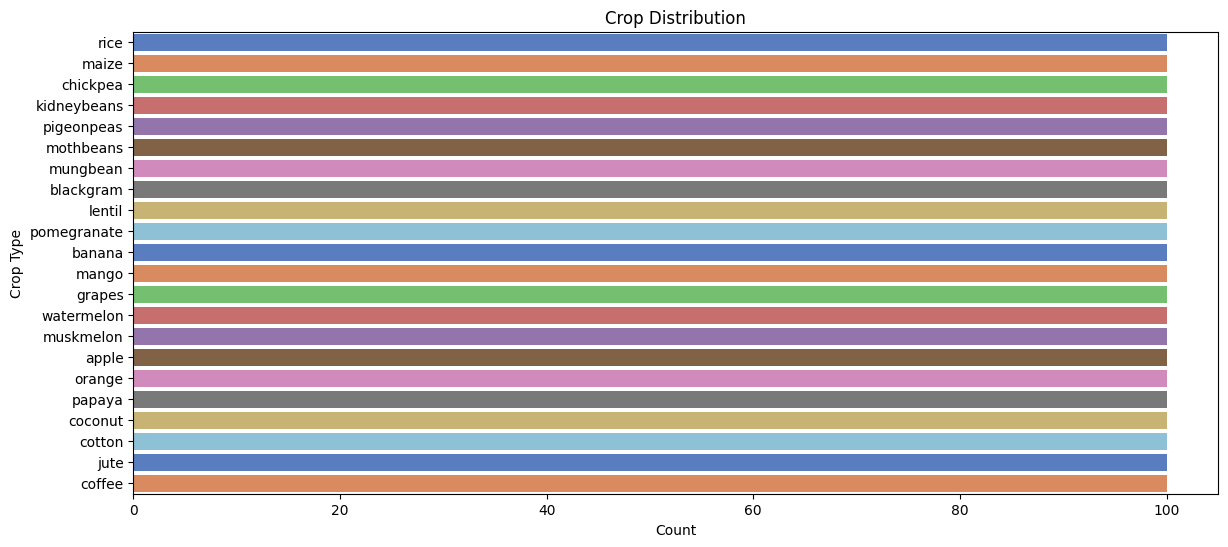

In [6]:
# Number of unique crops
uniqueCrops = cropData["label"].nunique()
print(f"\nNumber of unique crops: {uniqueCrops}")

# Frequency of each crop
cropCounts = cropData["label"].value_counts()
print("\nCrop distribution (count per crop):\n")
print(cropCounts)

# Plot crop distribution
plt.figure(figsize=(14, 6))
sns.countplot(y="label", data=cropData, order=cropCounts.index, hue="label", legend=False,  palette="muted")
plt.title("Crop Distribution")
plt.xlabel("Count")
plt.ylabel("Crop Type")
plt.show()


Feature Distributions and Outlier Detection

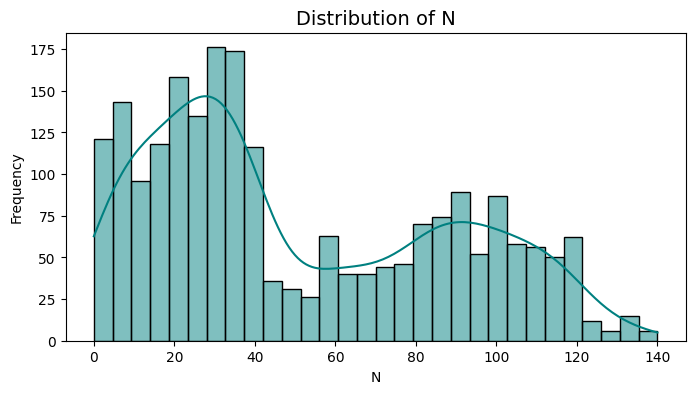

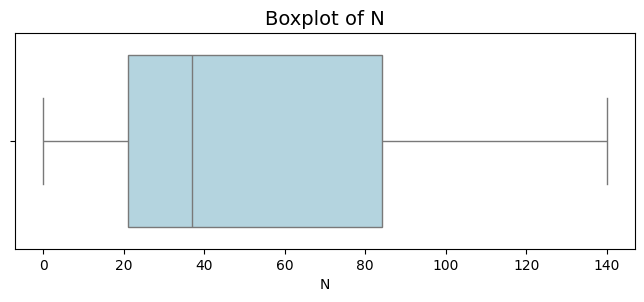

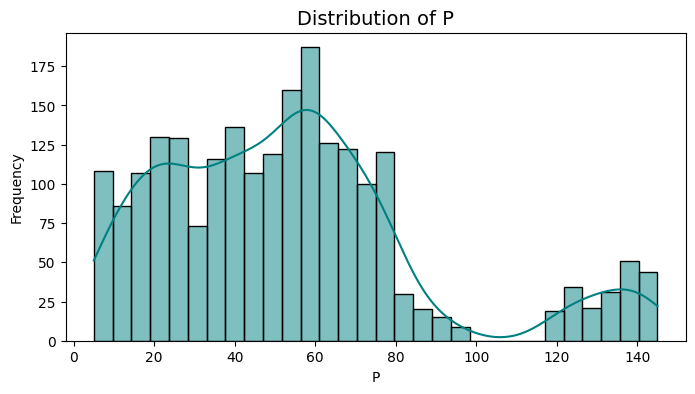

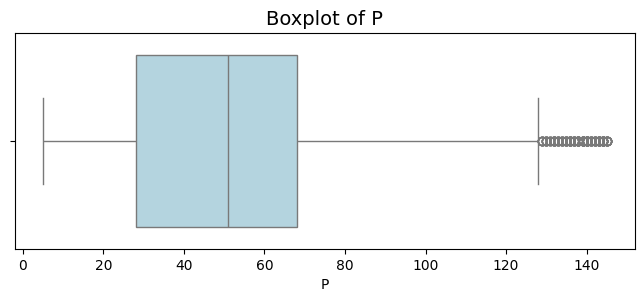

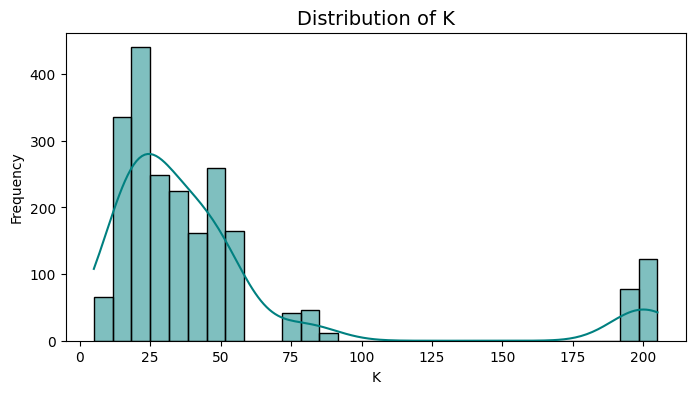

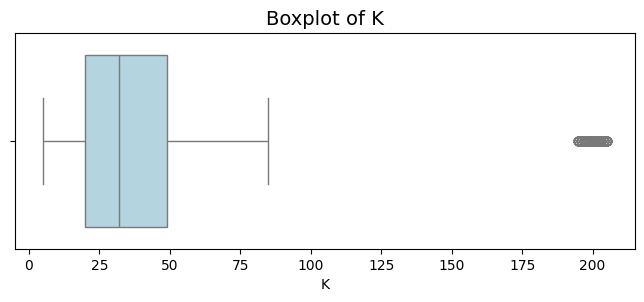

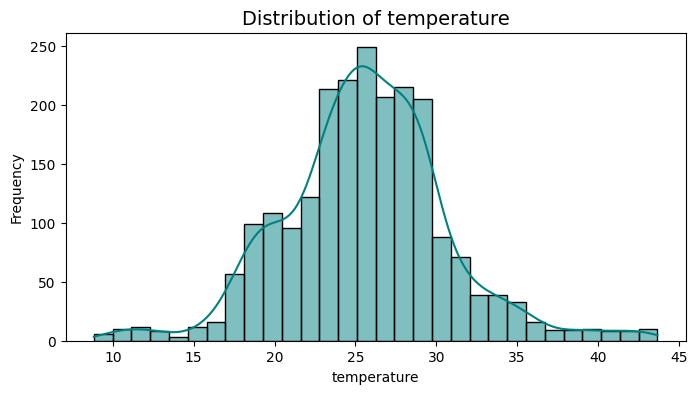

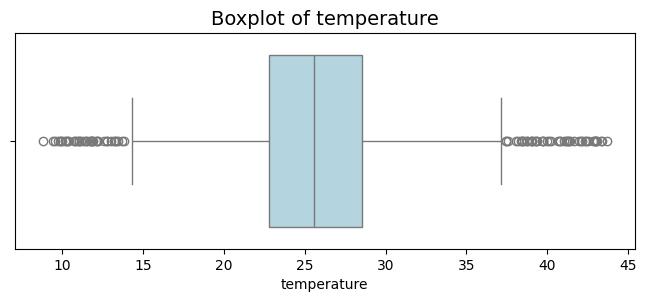

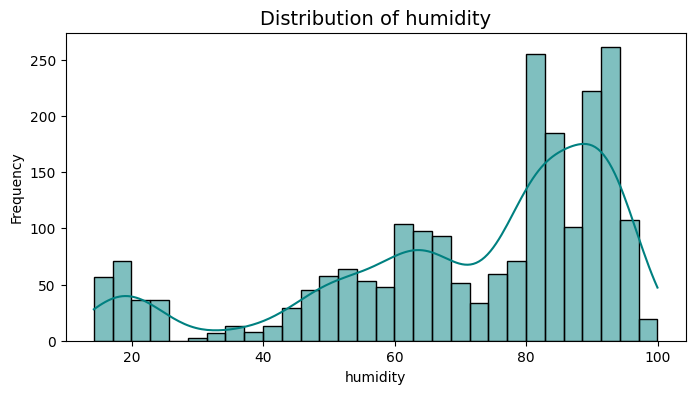

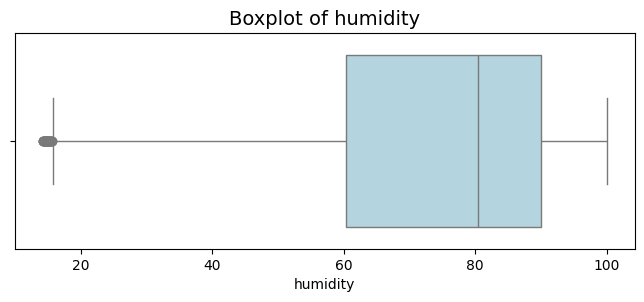

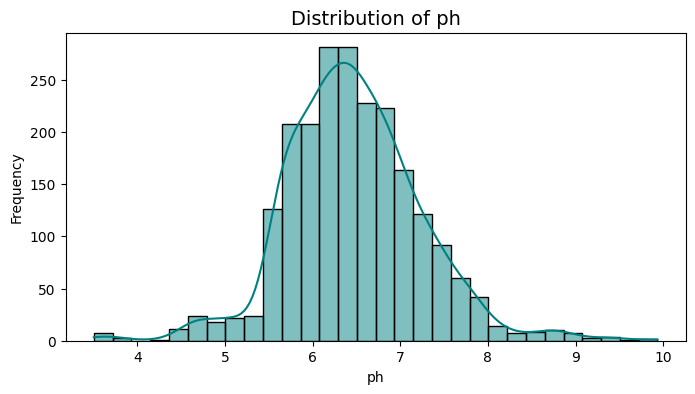

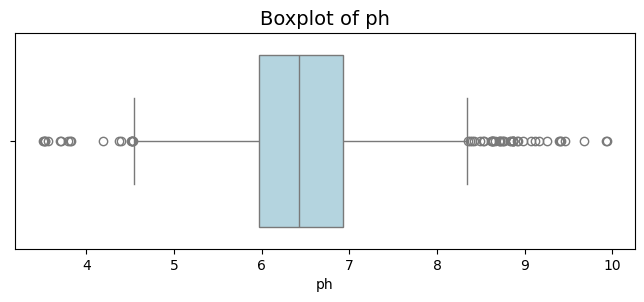

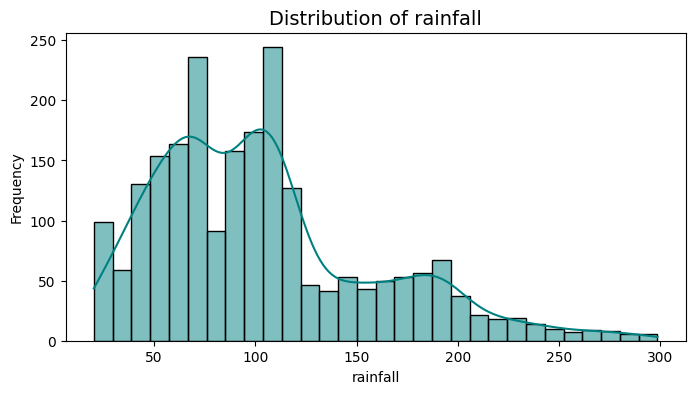

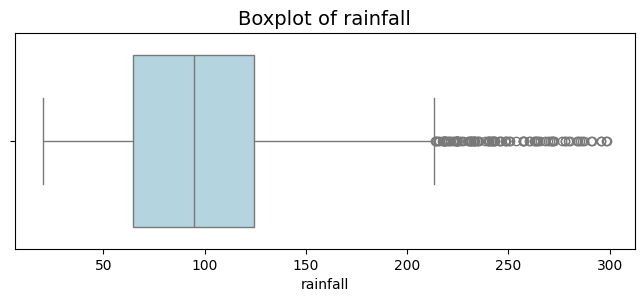

In [7]:
numericFeatures = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]

for feature in numericFeatures:
    # Histogram and KDE
    plt.figure(figsize=(8, 4))
    sns.histplot(cropData[feature], kde=True, bins=30, color="teal")
    plt.title(f"Distribution of {feature}", fontsize=14)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 2.8))
    sns.boxplot(x=cropData[feature], color="lightblue")
    plt.title(f"Boxplot of {feature}", fontsize=14)
    plt.xlabel(feature)
    plt.show()


Feature vs Target Relationship

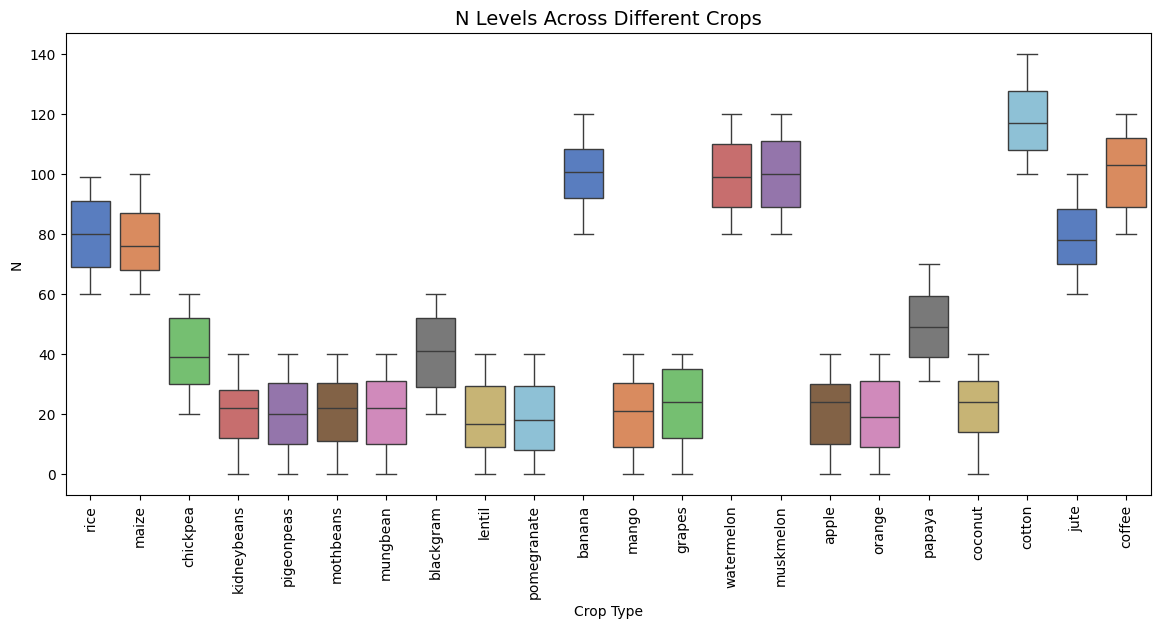

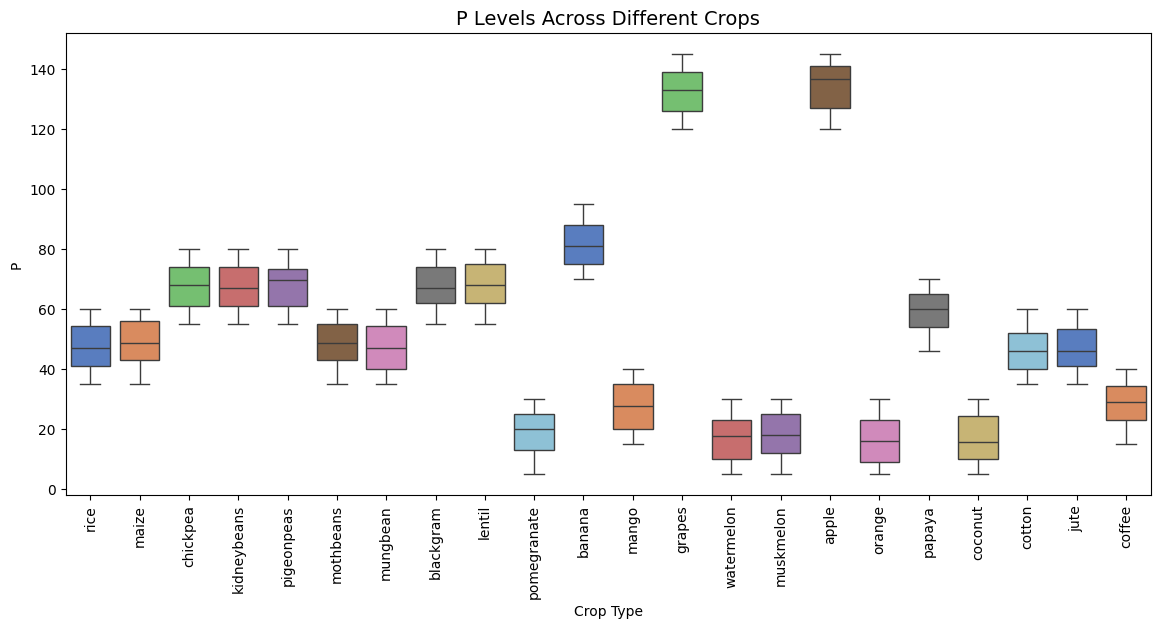

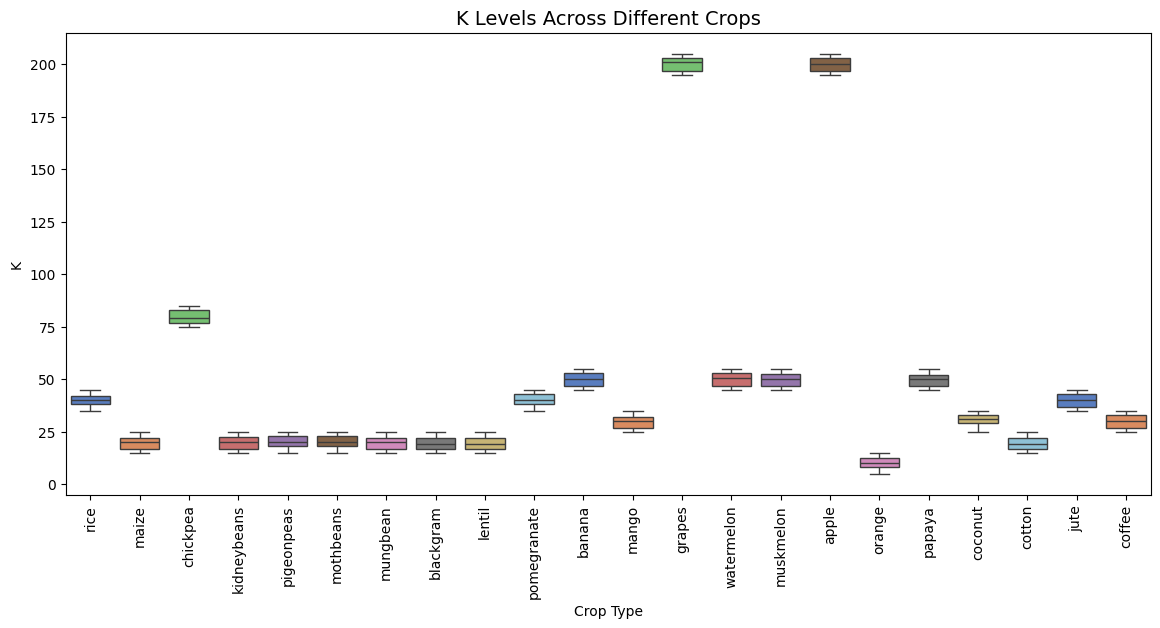

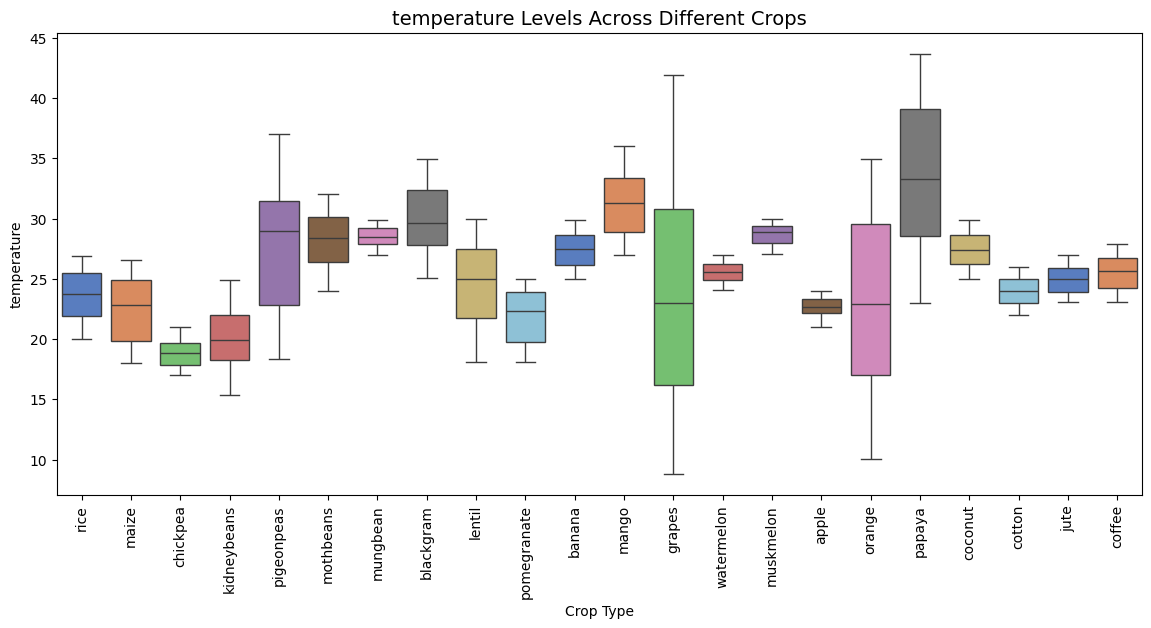

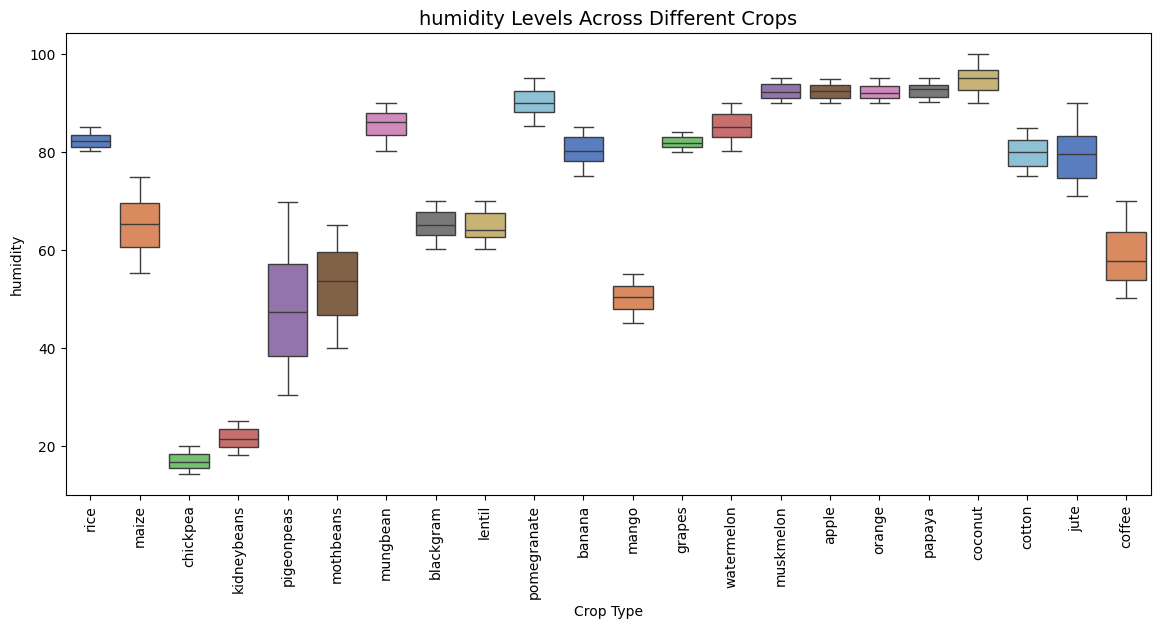

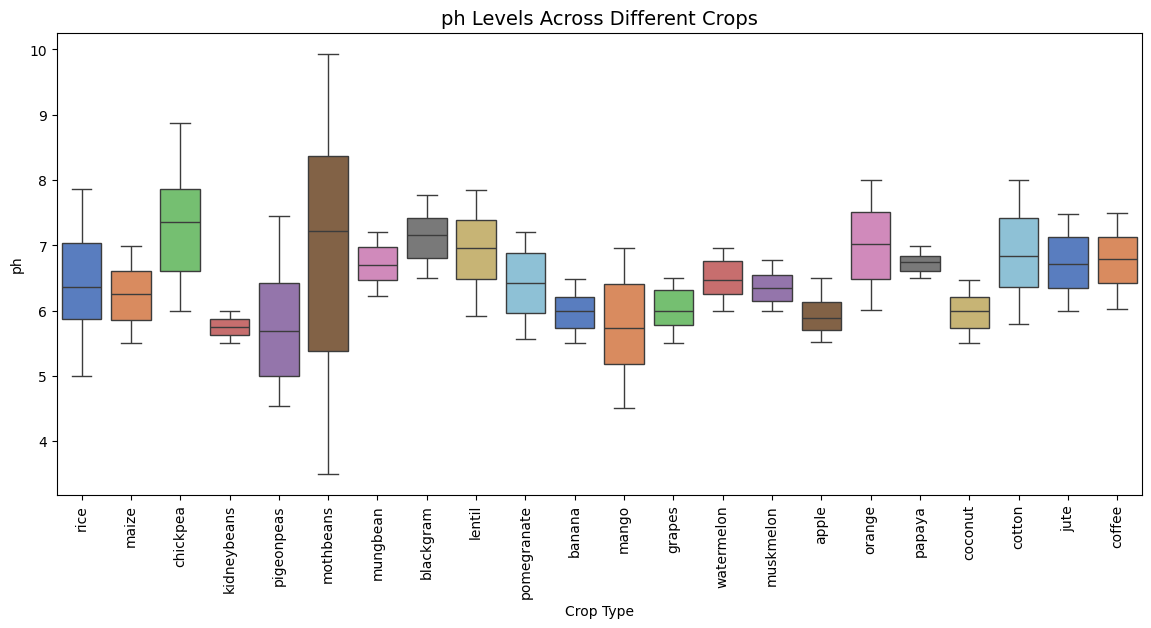

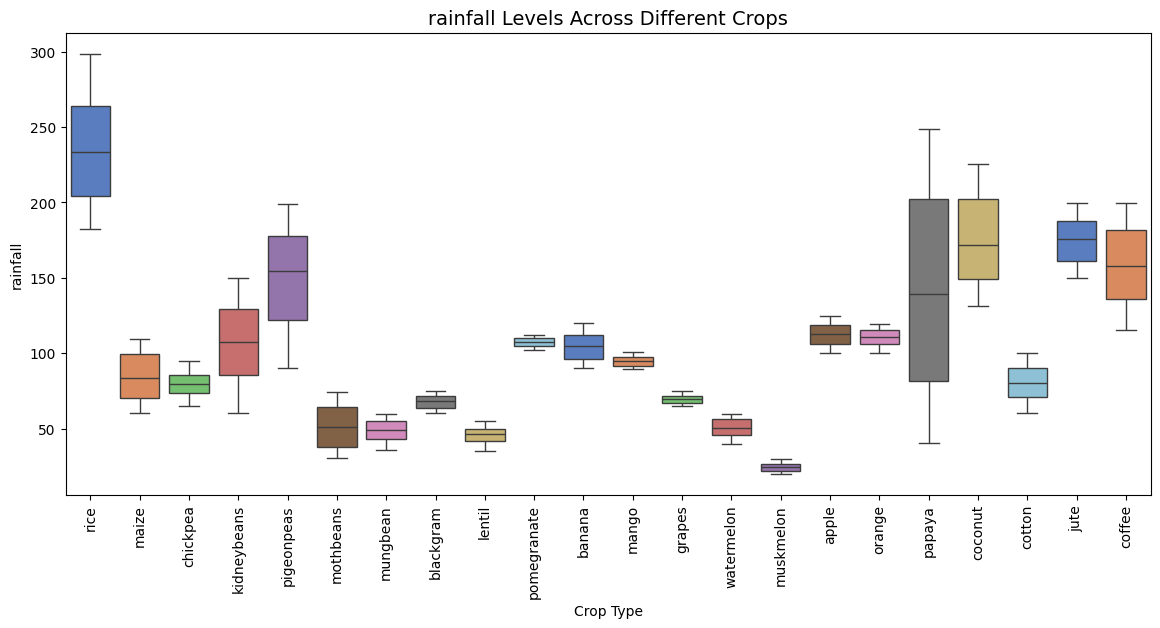

In [8]:
numericFeatures = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]

for feature in numericFeatures:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x="label", y=feature, data=cropData, hue="label", legend=False,  palette="muted")
    plt.title(f"{feature} Levels Across Different Crops", fontsize=14)
    plt.xticks(rotation=90)
    plt.xlabel("Crop Type")
    plt.ylabel(feature)
    plt.show()


Heatmap of Average Feature Values per Crop

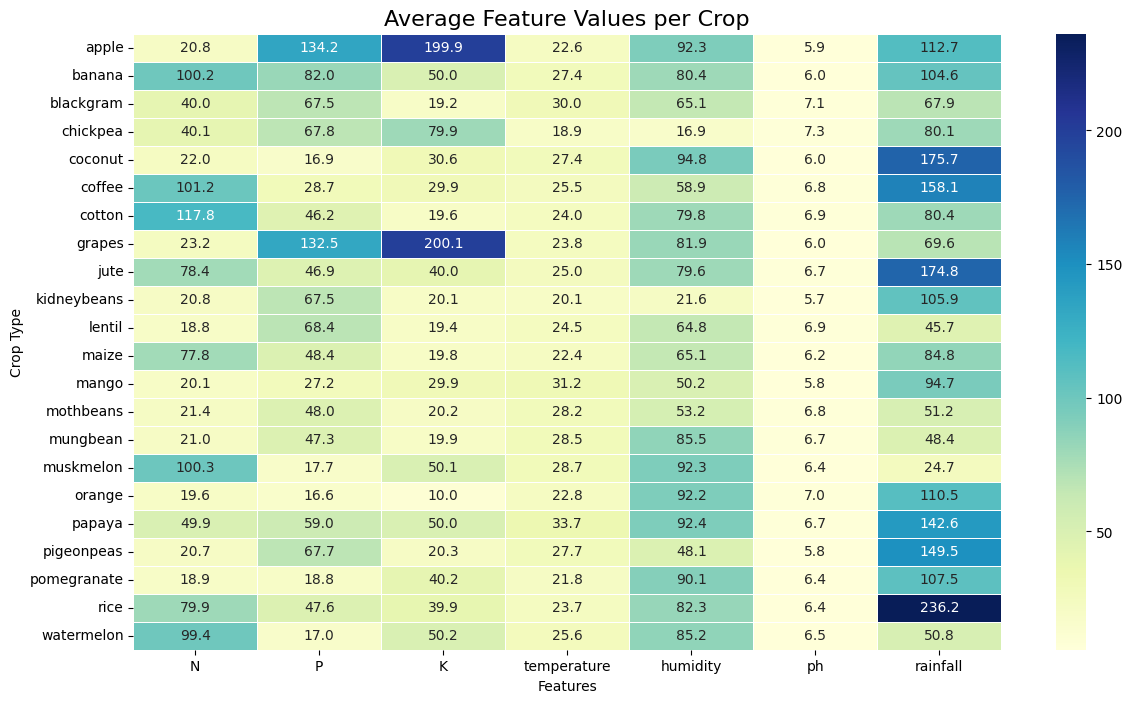

In [9]:
# Group by crop label and calculate the mean of features
cropFeatureMeans = cropData.groupby("label").mean()

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    cropFeatureMeans,
    cmap="YlGnBu",
    annot=True,
    fmt=".1f",
    linewidths=0.5
)
plt.title("Average Feature Values per Crop", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Crop Type")
plt.show()


Correlation Analysis Heatmap

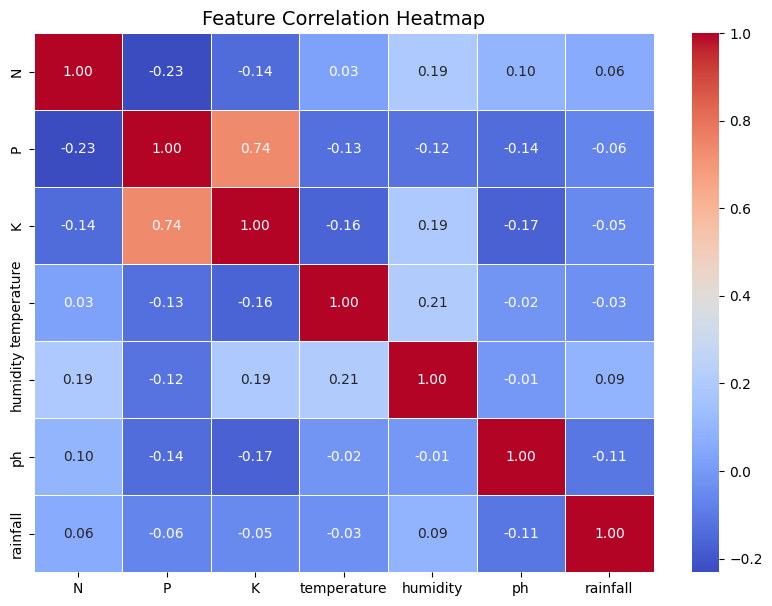

In [10]:
numericFeatures = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]

# Correlation matrix
correlationMatrix = cropData[numericFeatures].corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    correlationMatrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()
